# Programming Exercise
## A)
Create a dataset for regression by sampling 20 points $x \sim N(0,I), x \in \mathbb{R}^2$ and sample labels $y$ according to the distribution $p(y|x) = N(y;x^T \theta, 0.1), \theta = [-1,1]^T$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
seed = 42

In [ ]:
# defining parameters
mean_x = np.array([0, 0])
cov_x = np.array([[1, 0], [0, 1]])
theta = np.array([-1, 1])

In [4]:
print(f"mu_x :\n{mean_x}")
print(f"Sigma_x :\n{cov_x}")
print(f"theta: \n{theta}")

mu_x :
[0 0]
Sigma_x :
[[1 0]
 [0 1]]
theta: 
[-1  1]


In [5]:
# sampling from bivariate gaussian distribution
np.random.seed(seed)
X = np.random.multivariate_normal(mean_x, cov_x, size=20)

In [6]:
print(f"Sample: \n{X}")

Sample: 
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763 ]
 [ 0.0675282  -1.42474819]
 [-0.54438272  0.11092259]
 [-1.15099358  0.37569802]
 [-0.60063869 -0.29169375]
 [-0.60170661  1.85227818]
 [-0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012]
 [-1.32818605  0.19686124]]


In [8]:
X @ theta

array([-6.34978454e-01,  8.75341318e-01,  1.64177742e-05, -8.11778086e-01,
        1.01203443e+00, -2.31206076e-03, -2.15524252e+00,  1.16263030e+00,
        1.32707845e+00, -5.04279626e-01, -1.69142507e+00, -1.49227639e+00,
        6.55305314e-01,  1.52669160e+00,  3.08944940e-01,  2.45398480e+00,
       -1.04421370e+00, -2.04338856e+00, -2.16853372e+00,  1.52504728e+00])

In [9]:
# defining parameters for p(y|x)
# we approximate y with f_theta(x) = x^T theta
cov_y = 0.1

In [ ]:
# sampling 20 labels from p(y|s)~N(mu_y,sigma_y)
def generate_labels(X, theta, cov_y):
    labels = []
    for sample in X:
        y = np.random.normal(sample.T @ theta, cov_y, size=1)
        labels.append(y)
    return np.array(labels)
    #

In [ ]:
y = generate_labels(X, theta, cov_y).ravel()

In [12]:
y.shape

(20,)

# B)
Compute the mean and variance of the posterior distribution of the parameters of the model $f_{\theta}(x) = x^T\theta$ using the prior $\theta \sim \mathcal{N}(0,I_2)$. Plot the pdf in the range $\theta \in [-3,3]^2$


In [ ]:
# defining parameters of the prior distribution p(theta) ~ N(mu_theta, sigma_theta)
prior_mean = np.array([0, 0])
prior_cov = np.eye(2)

In [ ]:
# function for computing posterior mean assuming linear model, normal likelihood and normal prior
def posterior_mean(X, y, prior_mean, prior_cov, cov_y):
    N = X.shape[0]
    mu_post = (
        prior_mean
        + prior_cov @ X.T @ np.linalg.inv(cov_y * np.eye(N) + X @ prior_cov @ X.T) @ y
    )
    return mu_post

In [ ]:
post_mean = posterior_mean(X, y, prior_mean, prior_cov, cov_y)
print(f"Posterior mean:\n{post_mean}")

Posterior mean:
[-1.00755274  1.01937033]


In [ ]:
# function for computing posterior mean assuming linear model, normal likelihood and normal prior
def posterior_cov(X, prior_cov, cov_y):
    N = X.shape[0]
    sigma_post = (
        prior_cov
        - prior_cov
        @ X.T
        @ np.linalg.inv(cov_y * np.eye(N) + X @ prior_cov @ X.T)
        @ X
        @ prior_cov
    )
    return sigma_post

In [ ]:
post_cov = posterior_cov(X, prior_cov, cov_y)
print(f"Posterior covariance:\n{post_cov}")

Posterior covariance:
[[ 6.40408632e-03 -2.82979721e-05]
 [-2.82979721e-05  4.56579757e-03]]


Compute and plot the pdf in range $\theta \in [-3,3]^2$

In [ ]:
# Compute posterior PDF in range θ ∈ [-3, 3]^2
theta_1, theta_2 = np.meshgrid(
    np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
)  # defining a grid of parameters values
grid = np.c_[theta_1.ravel(), theta_2.ravel()]  # forming an actual grid
pdf = (
    multivariate_normal(mean=post_mean, cov=post_cov).pdf(grid).reshape(theta_1.shape)
)  # computing the pdf

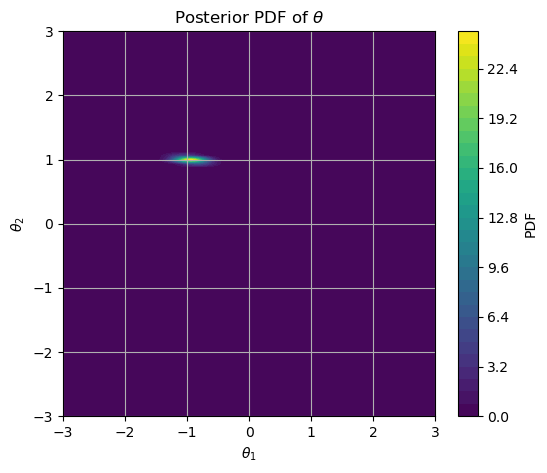

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot posterior PDF in range θ ∈ [-3, 3]^2
plt.figure(figsize=(6, 5))
plt.contourf(theta_1, theta_2, pdf, levels=30, cmap="viridis")
plt.title(r"Posterior PDF of $\theta$")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.colorbar(label="PDF")
plt.grid(True)
plt.show()

plt.savefig("posterior_B", dpi=250)

We see how our posterior distribution is center around (-1,1) which is indeed the real values of the parameter from which we generated y.

# C)
Compute the posterior predictive $p(y|x,D)$. Plot its variance for inputs in the range $x \in [-3,3]^2$

In this case the posterior predictive is given by
$$p(y|x,\mathcal{D}) = \mathcal{N}(x^T\mu_{\theta|\mathcal{D}},\sigma^2_{y} + x^T \Sigma_{\theta|\mathcal{D}} x)$$


In [ ]:
def posterior_predictive_variance(X_new, post_cov, cov_y):
    return np.array([x.T @ post_cov @ x + cov_y for x in X_new])

[0.33606348 0.32265985 0.30954612 ... 0.30954612 0.32265985 0.33606348]


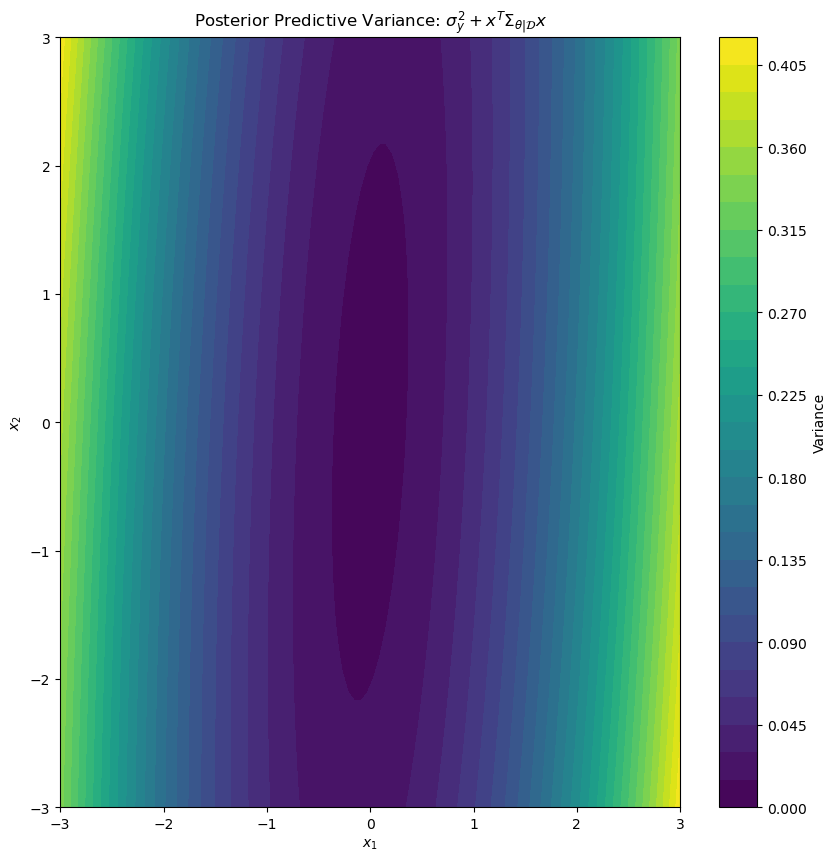

In [ ]:
# Compute the posterior predictive variance
grid_x1, grid_x2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_new = np.c_[grid_x1.ravel(), grid_x2.ravel()]
predictive_var = posterior_predictive_variance(X_new, post_cov, cov_y)

plt.figure(figsize=(10, 10))
plt.contourf(
    grid_x1, grid_x2, predictive_var.reshape(grid_x1.shape), levels=30, cmap="viridis"
)
plt.title(
    r"Posterior Predictive Variance: $\sigma^2_y + x^T\Sigma_{\theta|\mathcal{D}}x$ "
)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.colorbar(label="Variance")
plt.show()

we clearly see how the variance is itself normally distributed around the mean of the noise (0).

# D)
Repeat A-C) but now sample a dataset with input points $x \sim N(0,\Sigma_x)$


In [ ]:
sigma_x = np.array([[0.1, 0], [0, 1]])

In [27]:
X2 = np.random.multivariate_normal(mean_x, sigma_x, size=20)

In [28]:
# defining parameters for p(y|x)
# we approximate y with f_theta(x) = x^T theta
mean_yx = X2 @ theta  # using matrix notation: 20x2 x 2x1
cov_y = 0.1
# sampling 20 labels from p(y|s)~N(mu_y,sigma_y)
y = np.random.normal(mean_yx, cov_y, size=20)

In [ ]:
# defining parameters of the prior distribution p(theta) ~ N(mu_theta, sigma_theta)
prior_mean = np.array([0, 0])
prior_cov = np.eye(2)

In [ ]:
post_mean = posterior_mean(X2, y, prior_mean, prior_cov, cov_y)
print(f"Posterior mean:\n{post_mean}")

Posterior mean:
[-0.86239104  1.01877656]


In [ ]:
post_cov = posterior_cov(X2, prior_cov, cov_y)
print(f"Posterior covariance:\n{post_cov}")

Posterior covariance:
[[ 0.05120775 -0.00104594]
 [-0.00104594  0.00710896]]


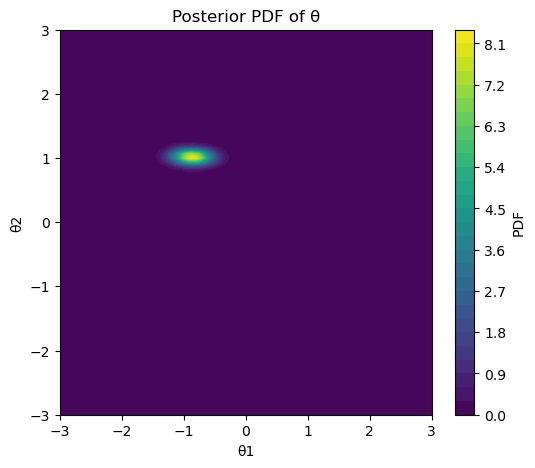

In [ ]:
# Compute posterior PDF in range θ ∈ [-3, 3]^2
theta_1, theta_2 = np.meshgrid(
    np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
)  # defining a grid of parameters values
grid = np.c_[theta_1.ravel(), theta_2.ravel()]  # forming an actual grid
pdf = (
    multivariate_normal(mean=post_mean, cov=post_cov).pdf(grid).reshape(theta_1.shape)
)  # computing the pdf
# Plot posterior PDF in range θ ∈ [-3, 3]^2
plt.figure(figsize=(6, 5))
plt.contourf(theta_1, theta_2, pdf, levels=30, cmap="viridis")
plt.title("Posterior PDF of θ")
plt.xlabel("θ1")
plt.ylabel("θ2")
plt.colorbar(label="PDF")
plt.grid(True)
plt.show()

plt.savefig("posteriorD1", dpi=250)

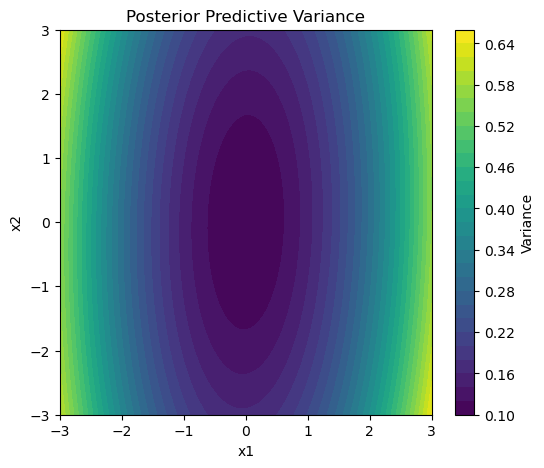

In [ ]:
# Compute the posterior predictive variance
grid_x1, grid_x2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_new = np.c_[grid_x1.ravel(), grid_x2.ravel()]
predictive_var = posterior_predictive_variance(X_new, post_cov, cov_y)

plt.figure(figsize=(6, 5))
plt.contourf(
    grid_x1, grid_x2, predictive_var.reshape(grid_x1.shape), levels=30, cmap="viridis"
)
plt.title("Posterior Predictive Variance")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Variance")
plt.show()

Now the uncertainty is all focus on the x2 axis since the variance of the other component is much closer to 0.

## D.2)
Use $p(y|x) = \mathcal{N}(y;x^T\theta,0.01)$

Posterior mean:
[-0.88848373  0.99220732]
Posterior covariance:
[[ 0.07737781 -0.00066564]
 [-0.00066564  0.00088128]]


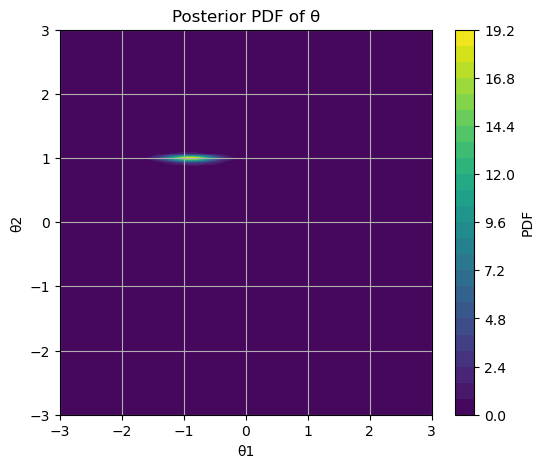

<Figure size 640x480 with 0 Axes>

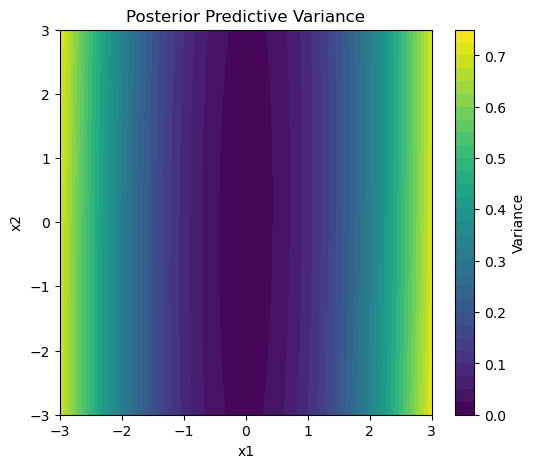

In [ ]:
sigma_x = np.array([[0.01, 0], [0, 1]])
X2 = np.random.multivariate_normal(mean_x, sigma_x, size=20)
# defining parameters for p(y|x)
# we approximate y with f_theta(x) = x^T theta
mean_yx = X2 @ theta  # using matrix notation: 20x2 x 2x1
cov_y = 0.01
# sampling 20 labels from p(y|s)~N(mu_y,sigma_y)
y = np.random.normal(mean_yx, cov_y, size=20)
# defining parameters of the prior distribution p(theta) ~ N(mu_theta, sigma_theta)
prior_mean = np.array([0, 0])
prior_cov = np.eye(2)
post_mean = posterior_mean(X2, y, prior_mean, prior_cov, cov_y)
print(f"Posterior mean:\n{post_mean}")
post_cov = posterior_cov(X2, prior_cov, cov_y)
print(f"Posterior covariance:\n{post_cov}")
# Compute posterior PDF in range θ ∈ [-3, 3]^2
theta_1, theta_2 = np.meshgrid(
    np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
)  # defining a grid of parameters values
grid = np.c_[theta_1.ravel(), theta_2.ravel()]  # forming an actual grid
pdf = (
    multivariate_normal(mean=post_mean, cov=post_cov).pdf(grid).reshape(theta_1.shape)
)  # computing the pdf
# Plot posterior PDF in range θ ∈ [-3, 3]^2
plt.figure(figsize=(6, 5))
plt.contourf(theta_1, theta_2, pdf, levels=30, cmap="viridis")
plt.title("Posterior PDF of θ")
plt.xlabel("θ1")
plt.ylabel("θ2")
plt.colorbar(label="PDF")
plt.grid(True)
plt.show()

plt.savefig("posteriorD2", dpi=250)
# Compute the posterior predictive variance
grid_x1, grid_x2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_new = np.c_[grid_x1.ravel(), grid_x2.ravel()]
predictive_var = posterior_predictive_variance(X_new, post_cov, cov_y)

plt.figure(figsize=(6, 5))
plt.contourf(
    grid_x1, grid_x2, predictive_var.reshape(grid_x1.shape), levels=30, cmap="viridis"
)
plt.title("Posterior Predictive Variance")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Variance")

plt.show()


the variance is order or magnitude smaller but maintains the shame "shape".